In [3]:
import torch 
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
import torch.nn.functional as F
import matplotlib.pylab as plt
import numpy as np
torch.manual_seed(2)

In [4]:
class Net(nn.Module):
    def __init__(self, D_in, H1, H2, D_out):
        super(Net, self).__init__()
        self.linear1 = nn.Linear(D_in, H1)
        self.linear2 = nn.Linear(H1, H2)
        self.linear3 = nn.Linear(H2, D_out)
        
    def forward(self, x):
        x = torch.sigmoid(self.linear1(x))
        x = torch.sigmoid(self.linear2(x))
        x = self.linear3(x)
        
        return x

In [5]:
class Net_tanh(nn.Module):
    def __init__(self, D_in, H1, H2, D_out):
        super(Net_tanh, self).__init__()
        self.linear1 = nn.Linear(D_in, H1)
        self.linear2 = nn.Linear(H1, H2)
        self.linear3 = nn.Linear(H2, D_out)
        
    def forward(self, x):
        x = torch.tanh(self.linear1(x))
        x = torch.tanh(self.linear2(x))
        x = self.linear3(x)
        
        return x

In [6]:
class Net_relu(nn.Module):
    def __init__(self, D_in, H1, H2, D_out):
        super(Net_relu, self).__init__()
        self.linear1 = nn.Linear(D_in, H1)
        self.linear2 = nn.Linear(H1, H2)
        self.linear3 = nn.Linear(H2, D_out)
        
    def forward(self, x):
        x = torch.relu(self.linear1(x))
        x = torch.relu(self.linear2(x))
        x = self.linear3(x)
        
        return x

In [7]:
def train(model, criterion, train_loader, validation_loader, optimizer, epochs = 10):
    i = 0
    useful_stuff = {'training_loss': [], 'validation_accuracy': []}
    
    for epoch in range(epochs):
        for i, (x, y) in enumerate(train_loader):
            optimizer.zero_grad()
            
            z = model(x.view(-1, 28*28))
            
            loss = criterion(z, y)
            loss.backward()
            
            optimizer.step()
            
            useful_stuff['training_loss'].append(loss.data.item())
            
        print("epoch: ", epoch,"/",epochs,"  loss: ", loss.data.item())
        
        correct = 0
        
        for x, y in validation_loader:
            z = model(x.view(-1, 28*28))
            _, label = torch.max(z, 1)
            correct += (label == y).sum().item()
            
            
        accuracy = 100 * (correct/len(validation_dataset))
        useful_stuff['validation_accuracy'].append(correct)
        
    return useful_stuff

In [8]:
train_dataset = dsets.MNIST(root = './data', train=True, download = True, transform = transforms.ToTensor())

In [9]:
validation_dataset = dsets.MNIST(root = './data', download = True, transform = transforms.ToTensor())

In [10]:
train_loader = torch.utils.data.DataLoader(dataset = train_dataset, batch_size = 2000, shuffle = True)
validation_loader = torch.utils.data.DataLoader(dataset = validation_dataset, batch_size = 5000, shuffle = False) 

In [11]:
input_dim = 28*28
h1 = 50
h2 = 50
output_dim = 10

model = Net(input_dim, h1, h2, output_dim)
model_tanh = Net_tanh(input_dim, h1, h2, output_dim)
model_relu = Net_relu(input_dim, h1, h2, output_dim)

In [12]:
criterion = nn.CrossEntropyLoss()

In [18]:
learning_rate = 0.01
optim1 = torch.optim.SGD(model.parameters(), lr = learning_rate)
optim2 = torch.optim.SGD(model_tanh.parameters(), lr = learning_rate)
optim3 = torch.optim.SGD(model_relu.parameters(), lr = learning_rate)

In [22]:
training_results = train(model, criterion, train_loader, validation_loader, optim1, epochs = 25)
training_results_tanh = train(model_tanh, criterion, train_loader, validation_loader, optim2, epochs = 25)
training_results_relu = train(model_relu, criterion, train_loader, validation_loader, optim3, epochs = 25)


epoch:  0 / 25   loss:  2.2963807582855225
epoch:  1 / 25   loss:  2.2977817058563232
epoch:  2 / 25   loss:  2.299802780151367
epoch:  3 / 25   loss:  2.2972030639648438
epoch:  4 / 25   loss:  2.2983453273773193
epoch:  5 / 25   loss:  2.2972233295440674
epoch:  6 / 25   loss:  2.2951512336730957
epoch:  7 / 25   loss:  2.298149585723877
epoch:  8 / 25   loss:  2.296769857406616
epoch:  9 / 25   loss:  2.2948551177978516
epoch:  10 / 25   loss:  2.297483444213867
epoch:  11 / 25   loss:  2.2971887588500977
epoch:  12 / 25   loss:  2.2966415882110596
epoch:  13 / 25   loss:  2.2978525161743164
epoch:  14 / 25   loss:  2.2957046031951904
epoch:  15 / 25   loss:  2.2966437339782715
epoch:  16 / 25   loss:  2.297231435775757
epoch:  17 / 25   loss:  2.2934231758117676
epoch:  18 / 25   loss:  2.2940030097961426
epoch:  19 / 25   loss:  2.2964653968811035
epoch:  20 / 25   loss:  2.295623302459717
epoch:  21 / 25   loss:  2.2928988933563232
epoch:  22 / 25   loss:  2.292949676513672
epoch

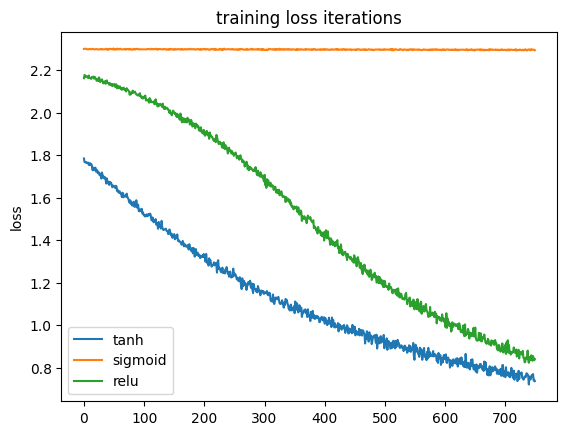

In [23]:
plt.plot(training_results_tanh['training_loss'], label='tanh')
plt.plot(training_results['training_loss'], label='sigmoid')
plt.plot(training_results_relu['training_loss'], label='relu')
plt.ylabel('loss')
plt.title('training loss iterations')
plt.legend()

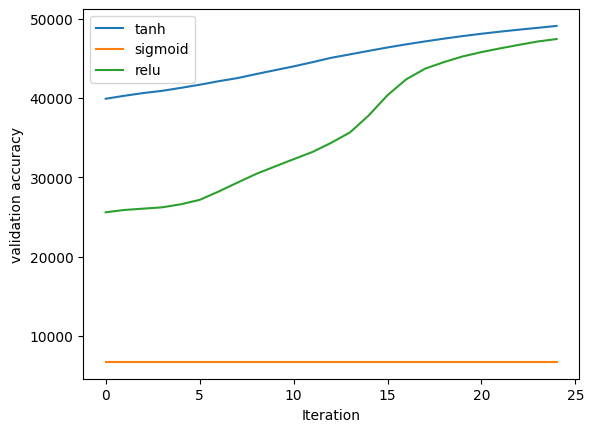

In [24]:
plt.plot(training_results_tanh['validation_accuracy'], label = 'tanh')
plt.plot(training_results['validation_accuracy'], label = 'sigmoid')
plt.plot(training_results_relu['validation_accuracy'], label = 'relu') 
plt.ylabel('validation accuracy')
plt.xlabel('Iteration')   
plt.legend()